# Lab 4: Working with 'real' data

In [57]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics

#this sets the size of the plot to something useful
# plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('lab4/gammaray_lab4.h5', 'r') # import data
hf.keys()
data = np.array(hf.get('data'))
data[:,0]
hf.close() # close file

In [10]:
## Problem 1

### 1) Import the data into your environment and create a few plots that can help one better understand the contents of the data.

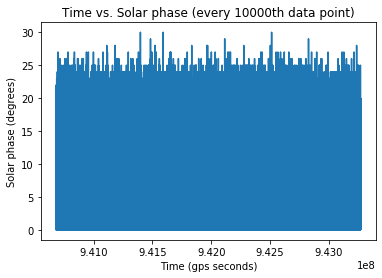

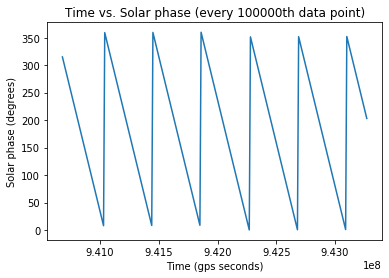

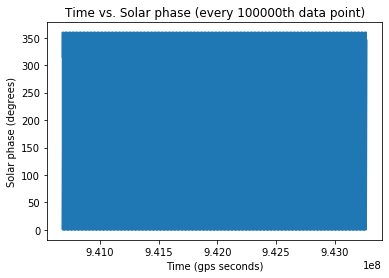

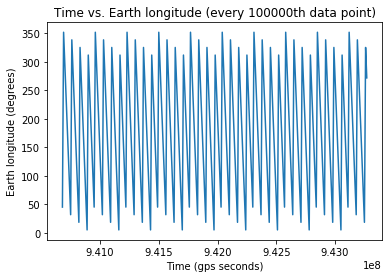

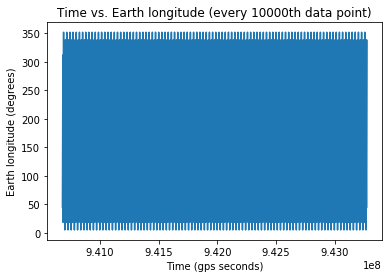

2593
7.1714


2592
2592


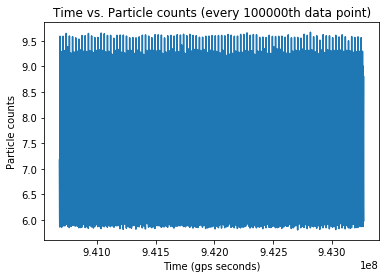

In [62]:
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 10000th data point)')
plt.plot(data[0], data[3])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 100000th data point)')
plt.plot(data[0][::100000], data[1][::100000])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Solar phase (degrees)')
plt.title('Time vs. Solar phase (every 100000th data point)')
plt.plot(data[0][::100], data[1][::100])
plt.show()

plt.title('Time vs. Earth longitude (every 100000th data point)')
plt.xlabel('Time (gps seconds)')
plt.ylabel('Earth longitude (degrees)')
plt.plot(data[0][::100000], data[2][::100000])
plt.show()
plt.xlabel('Time (gps seconds)')
plt.ylabel('Earth longitude (degrees)')
plt.title('Time vs. Earth longitude (every 10000th data point)')
plt.plot(data[0][::10000], data[2][::10000])
plt.show()

plt.title('Time vs. Particle counts (every 100000th data point)')
plt.xlabel('Time (gps seconds)')
plt.ylabel('Particle counts')
counts = []
print(len(data[0][::10000]))
print(statistics.mean(data[3][0:10000]))
num = int(len(data[3])/10000)
for i in range(num):
    counts.append(statistics.mean(data[3][i * 10000:(i + 1) * 10000]))
print(len(counts))
total = []
# for i in range(num * 100000, len(data[3])):
#     total.append(data[3][i])
# counts.append(statistics.mean(total))
print(len(counts))
thing = data[0][::10000]
thing = thing[:-1]
plt.plot(thing, counts)
plt.show()
# for i in range(data[3][::100000])
# plt.title('Time vs. Particle counts (every 100000th data point)')
# plt.xlabel('Time (gps seconds)')
# plt.ylabel('Particle counts')
# plt.plot(data[0][::100000], data[3][::100000])
# plt.show()
# plt.xlabel('Time (gps seconds)')
# plt.ylabel('Particle counts')
# plt.title('Time vs. Particle counts (every 10000th data point)')
# plt.plot(data[0][::10000], data[3][::10000])
# plt.show()

Because the dataset holds nearly 25 million datapoints the computer could not make computations on somany values and even when it was able to, it displayed a useless graph that looked like one block of color. In order to accomodate for this issue I graphed every 100,000 datapoints in the dataset which give me a more detailed view of what my graph looks like and I put each of the different columns of data with respect to time.

My first graph is Time versus Solar phase. What I noticed about this graph is a consistently repeating pattern of reversed, sawtooth behavior. Its period was about every .005 * 10^8 seconds and its peak hit nearly the same value everytime. I also confirmed that this repeating behavior was consistent by plotting another graph of Time versus Solar phase but for every 10,000 datapoints so I can view a larger subset of the data and the same sawtooth pattern appeared. Somethign to note about this graph was that the sawtooth shape displaces downward more and more, which is represented by the larger sawtooth shaped in the graph of every 10,000 datapoints, but it resets at the starting height soon thereafter. This behavior is explained because we are looking at the position of the sun relative to the orbit so of course as we orbit the sun's position with respect to the orbit will vary between 0 to 360 degrees. Thus, the sun will start at a position 360 degrees from orbit and in a linear fashion (sawtooth shape) the orbit will slowly move so that the angle to the soon slowly reach 0. Then, when it reaches zero it shoots all the way back up to 360 degrees instantly because it continues this orbiting pattern rather than stopping and going backwards.

My second graph is Time versus Earth longitude and this graph also appeared to display a repeating trianglular wave pattern. Its period was about .0025 * 10^8 seconds and in each phase there were four triangle waves, each of which were displaced lower than its previous triangular wave. Again I confirmed that the pattern of this graph was consistent throughout the entire dataset by plotting every 10,000 data points and seeing that the same pattern persists. This behavior is explained because the orbit of earth is an eclipse and so it orbits the earth in a fashion that has the angle move between a range of 0 to 360 degrees.

My third graph is Time versus Particle counts is the most unique of the three graph types because there appears to be no repeating or continuous problems. The particle counts seem to be very random with respect to time and even zoomed out, at every 10,000 data points, we can see that the shape of the data is random. This behavior is explained because the gamma-ray satellite is low orbit so many of the signals could be blocked by earth which would give this sporatic dataset. There appears to be signal contamination in this dataset because there are certain datapoints and groups of datapoints that deviate from the percieved average of the data. I plan to build a background pdf using a Poisson distrbiution because you are measuring the number of events occur over time which are discrete independent events.

### 2)

The background of the time vs solar phase, earth longitude, and particle counts are not consistent with each other and differ in a few ways. The background of time versus Solar phase has a background that contributes to the random displacement of the sawtooth shaped graph downwards. The background of time versus Earth longitude has a background that also contributes to a downward displacement of the sawtooth shaped graph. The background of time versus particle counts contributes to the random spikes of particles and random nature of the particles counted with respect to time. Something to note is that all of the graphs except for the one with particle counts are time dependent.

### 3)

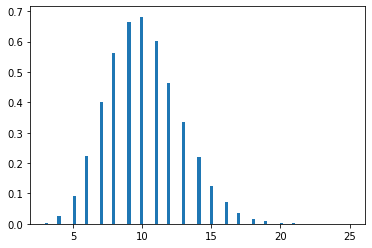

In [45]:
# mu = statistics.mean(data[3][::100000])
# plt.plot(data[0][::100000], stats.poisson.pmf(data[3][::100000],mu))
# plt.show()
mu = statistics.mean(data[3][::100000])
std = statistics.stdev(data[3][::100000])
d = stats.poisson.rvs(mu, std, size = 100000)
plt.hist(d, 100, density=True)
plt.show()

### 4)

## Problem 2

### 1)

### 2)

### 3)

### 4)